# Introduction to Sympy

This introduction to Sympy is mostly derived from http://docs.sympy.org/latest/tutorial/index.html.

## Why sympy?

In [1]:
import math
import sympy
print math.sqrt(8)
print sympy.sqrt(8)

2.82842712475
2*sqrt(2)


 * Symbolic computations manipulate and give result that are exact and not subject to numerical precision errors.
 * SymPy is fully written in Python. That means that you can integrate symbolic computations in the middle of a large application doing a lot of other things. It is also easy to drive SymPy with automated tools, not just human interfacing/exploring.
 * Maple or Mathematica invented their own language. Here if you know Python, you can use SymPy. No new language to learn.
 * It can compute things as well as render expressions nicely with MathJax and generate code in LaTeX, C, Fortran, ... 

## Gotchas about Sympy expressions and Sympy variables vs python variables

In [2]:
from sympy import *

In [3]:
# That doesn't magically make x some kind of unknown variable we could work with
2*x**2 + 4*x + 2

NameError: name 'x' is not defined

In [4]:
x, y = symbols("x y")

In [5]:
expr = 3*x + y

In [6]:
expr +1

3*x + y + 1

In [7]:
expr**2

(3*x + y)**2

In [8]:
expand(expr**2)

9*x**2 + 6*x*y + y**2

In [9]:
# Hack to add a symbolic variable in interactive session
var('a')
# Ranges can be created (works with the symbols() function as well)
print var('a:h')
print var('a:10')

(a, b, c, d, e, f, g, h)
(a0, a1, a2, a3, a4, a5, a6, a7, a8, a9)


In [10]:
# Note the difference between a python re-assignment vs assigning a 
# value to a sympy variable
x = 1
y = 1
# Is this 4 now?
print expr

3*x + y


In [11]:
# No, Sympy expressions are immutable and x=1 was simply a python assignment.
# Let's get back to x and y being sympy variables
x, y = symbols("x y")

In [12]:
expr.subs({x:1, y:1})
# This controls the order of the substitution
expr.subs([(x,1), (y,1)])

4

In [13]:
# Also list comprehension can allow you to build a complex substitution. For example in the expression 
# below, we want to replace x in all even powers of x by y
expr = x**5 + x**4 + x**3 + x**2 + x + 1
subs = [(x**i, y**i) for i in range(5) if i%2 == 0]
expr.subs(subs)

x**5 + x**3 + x + y**4 + y**2 + 1

In [14]:
# subs is smart enough to force the appearance of the expression to replacee = 
e = x**4 + 1
e.subs("x**2", "y")

y**2 + 1

In [15]:
expr1 = (x+1)**2
expr2 = x**2 + 2*x + 1

In [16]:
print expr1 == expr2 # This doesn't do any operation to compare
print simplify(expr1 - expr2)

False
0


In [17]:
expr = Eq(x, y)
expr

x == y

In [18]:
expr.lhs, expr.rhs

(x, y)

In [19]:
# Watch out if you have expressions with an integer divided by another 
# (this is still python!)
print 1/2
print Rational(1,2)

0
1/2


## Getting a decimal value?

In [20]:
pi.evalf(100)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068

In [21]:
expr = cos(2*x) + pi
expr.subs({x: 2.4}).evalf(100)
# You can do the substitution as the same time. 
expr.evalf(100, subs={x: 2.4})
# It will be done at the precision requested so it is better than .subs().evalf(100)

3.229091637029239630828477033526913816091281029040495081818176121719754372977144944197540614398230493

In [22]:
# An example of integrating in these computations some of the python and numpy construct
arr = np.empty(10)
for i, value in enumerate(range(10)):
    arr[i] = expr.evalf(30, subs={x: value}) 
    
# Note: in the numpy array element assignment, some casting is done to go from a sympy 
# float to a numpy float
print np.min(arr), arr.dtype, type(expr.evalf(30, subs={x: value}))

2.18393317327 float64 <class 'sympy.core.numbers.Float'>


## Making things pretty?

In [23]:
init_printing()

In [24]:
expr = -2 * sqrt((x**2+1)/(x+5))

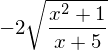

In [25]:
# The repr is going to look as pretty as your terminal supports
expr

In [26]:
# Do this if you want to copy and paste that expression
print expr

-2*sqrt((x**2 + 1)/(x + 5))


In [27]:
print latex(expr)

- 2 \sqrt{\frac{x^{2} + 1}{x + 5}}


In [28]:
# You can also generate C or Fortran 77 code...
ccode(expr)

'-2*sqrt((pow(x, 2) + 1)/(x + 5))'

In [29]:
fcode(expr)

'      -2*sqrt((x**2 + 1)/(x + 5))'

## Simplifications

In [30]:
#There is a general function for simplifying expressions
simplify(cos(x)**2 + sin(x)**2)

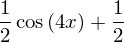

In [31]:
# For trigonometric expressions or powers, there are additional 
# specialized simplification functions
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

In [32]:
powsimp(x**a*x**b)

In [33]:
# The problem is that simplify doesn't always have the same 
# definition  of simplicity than you:
simplify(x**2 + 2*x+1)

In [34]:
# So it pays to be explicit
factor(x**2 + 2*x+1)

In [35]:
expand((x+1)**2)

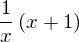

In [36]:
cancel((x**2 + 2*x + 1)/(x**2+x))

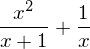

In [37]:
expr = 1/x + x**2/(x+1)
expr

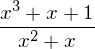

In [38]:
# Force this in the format of a numerator over a denominator
cancel(expr)

In [39]:
z = symbols("z")
expr = x**3 - x**2*z + 2*x**2 + x*y +x -3

In [40]:
# Force things in the format of a polynomial of x
collect(expr, x)

In [41]:
# That works with expressions, not just 1 variable:
expr = exp(x)*y + 2*exp(x) + 3
expr

In [42]:
collect(expr, exp(x))

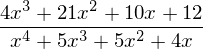

In [43]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr

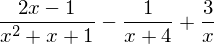

In [44]:
apart(expr)

## Calculus

In [45]:
# Derivative
diff(cos(x), x)

In [46]:
diff(x**4, x, 3)

In [47]:
# Multiple partial derivative
expr = exp(x*y*z)
diff(expr, x, y, y, z, z, z, z)

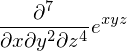

In [48]:
# Define a derivative but don't evaluate it
deriv = Derivative(expr, x, y, y, z, 4)
deriv

In [49]:
# Forcing its computation is done with its doit method:
deriv.doit()

## Integral

In [50]:
integrate(cos(x), x)

In [51]:
integrate(exp(-x), (x, 0, oo))

In [52]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

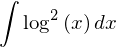

In [53]:
# Again it is possible to define a unevaluated integral
expr = Integral(log(x)**2, x)
expr

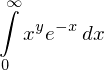

In [54]:
# Sympy can do complex stuff too 
integ = Integral(x**y*exp(-x), (x, 0, oo))
integ

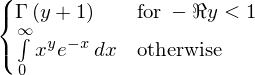

In [55]:
integ.doit()

## Limits

In [56]:
limit(sin(x)/x, x, 0)

In [57]:
expr = x**2/exp(x)
expr.subs(x, oo)
limit(expr, x, oo)

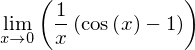

In [58]:
expr = Limit((cos(x) - 1)/x, x, 0)
expr

In [59]:
expr.doit()

In [60]:
# Limits on one side of a value can be done:
limit(1/x, x, 0, '+')

## Series expansion

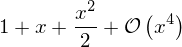

In [61]:
expr = exp(sin(x))
expr.series(x, 0, 4)

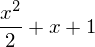

In [62]:
# Or many you are not interested in the Landau order term
expr.series(x, 0, 4).removeO()

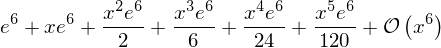

In [63]:
expr = exp(x)
expr.series(x0=6)

## Equation solving

To build an equation, you need to create an instance of one
`Eq`.

In [64]:
solve(Eq(x**2, 1), x)
solve(Eq(x**2 - 1, 0), x)

In [65]:
# If you try to solve an expression, it is assumed you want 
# it to be equal to 0
solve(x**2 - 1, x)

In [66]:
# Sometimes there are no solutions, 
solve(exp(x), x)

In [67]:
# Or sometimes the solution cannot be found analytically and an exception is raised.
# This means that we will need to pass that problem to scipy instead...
solve(x - cos(x), x)

NotImplementedError: multiple generators [x, cos(x)]
No algorithms are implemented to solve equation x - cos(x)

In [68]:
# Solve only gives a solution once. Use roots to find the 
# multiplicities of a solution.
print solve(x**3 - 6*x**2 + 9*x, x)
print roots(x**3 - 6*x**2 + 9*x, x)

[0, 3]
{3: 2, 0: 1}


In [69]:
# Systems of equations
solve([x*y - 7, x + y - 6], [x, y])

## Differential equations

To deal with that we will need to create some symbols/variables that  are functions.

In [70]:
f, g = symbols('f g', cls=Function)

In [71]:
f(x)

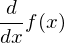

In [72]:
f(x).diff(x)

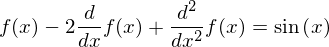

In [73]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))
diffeq

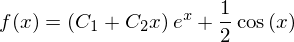

In [74]:
dsolve(diffeq, f(x))